# Assignment I: Network Theory

In this assignment I will be exploring Fourier Series of a Sawtooth Wave of desired frequency, I will also explore the Dirichlet Kernel in 2D and 3D space and numerically calculate its integral for different values of parameters using Simpson's 1/3rd rule.

## Importing the Necessary Libraries 
* __Numpy__: For performing mathematical operations.
* __Matplotlib__: For visualising our functions and operations.
* __Scipy__: Used to generate signals such as the Sawtooth wave.
* __mplot3d__: Used to plot 3D data.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal
from mpl_toolkits import mplot3d

## Fourier Series for Sawtooth Wave:

## I have used an OOPs approach to solving the problem as it gives us more flexibility
### Functions:
A list of function and their uses are given below:

* __init__ function: This function is used to initialise our Fourier Series Object. It takes the frequency of the saw tooth wave as input

* __fit_sawtooth_wave__: This function calculates the Fourier Series terms according to formula given above. It takes as input the number of terms in the series and the interval for which we want to calculate the series.

* __plot_wave__: This function plots the resultant wave generated by our Fourier Series. It can also plot the orignal sawtooth wave if asked. It takes as input a list of number of terms in each wave that we want to plot, i.e., for each number in num_waves it will generate a fourier series corresponding to that number and plot it.

* __calc_error__: Calculates the power error.

* __plot_error__: This function plots the power error percentage or the error signal (depending on what we asked).

* __simpson_integral_estimator__: Given an array of function values it calculates the integral numerically. It takes as input an array of function values and the size of integrals steps h.

* __dirichlet_kernel__: Calculates and plots the value of the dirichlet kernel for a given N in the asked interval. It takes as input the value N.

* __compute_integral__: Calculates and Plots the value of the integral of the dirichlet kernel. It takes as input a list of values of N for which to calculate the integral and then plots the corresponding graph. It can also calculate the absolute value of the integrals if required

In [2]:
class FourierSeries:
    def __init__(self, freq):
        self.T_ = 1/freq #Caclulates the Time period of the wave.
        self.W_ = 2*np.pi*freq #Calculates the angular frequency of the wave.
        
    def fit_sawtooth_wave(self, num_terms, t=None):
        if t is None:
            t = np.linspace(-(1.5)*(self.T_),(1.5)*(self.T_),1000)
        y = 0
        #Calculating the fourier series value.
        for i in range(1,num_terms+1):
            y += ((-1)**(i+1))*(2/(i*np.pi))*(np.sin(i*self.W_*t)) #Calculates and sums the Fourier Series terms.
        return y
    
    def plot_wave(self, num_waves, plot_orignal=False):
        #Wave Prep
        t = np.linspace(-(1.5)*(self.T_),(1.5)*(self.T_),1000)
        fig,ax = plt.subplots(figsize=[10,10],dpi=200)
        orignal_wave = signal.sawtooth(self.W_*(t-self.T_/2))
        ax.set_title("Fourier Series for Sawtooth Wave of frequency "+str(1/self.T_))
        ax.set_xlabel("Time --->")
        ax.set_ylabel("Signal Value --->")
        ax.axhline(0,color='k')
        ax.axvline(0,color='k')
        ax.set_xlim(-(1.5)*(self.T_)-0.01,(1.5)*(self.T_)+0.01)
        
        #Plots the orignal wave if asked.
        if plot_orignal==True:
            ax.plot(t,orignal_wave,label="Orignal Wave")
            ax.legend()
        
        #Plots the wave form for non-kernelised fourier series
        y = np.zeros([len(num_waves),1000])
        for i in range(0,len(num_waves)):
            y[i,:] = self.fit_sawtooth_wave(num_waves[i])
            if i in range(0,len(num_waves)):
                ax.plot(t, y[i,:],label="N = "+str(num_waves[i]))
            ax.legend()
        return
    def calc_error(self, y, t, power):
        orignal_wave = signal.sawtooth(self.W_*(t-self.T_/2))
        #Error Signal Calculation
        error = y - orignal_wave
        if power==False:
            return error
        #Power Error Calculation
        error = (np.linalg.norm(error))**(2)
        error = error/((np.linalg.norm(orignal_wave))**2)
        return error
    def plot_error(self, num_waves,power=True):
        #Preparing the plot.
        fig, ax = plt.subplots(figsize=[10,10],dpi=200)
        ax.set_title("Power Error Plots")
        ax.set_xlabel("t --->")
        ax.set_ylabel("Error Signal Value --->")
        t = np.linspace(-0.5*(self.T_),0.5*(self.T_),1000)
        errors = np.zeros([len(num_waves),1])
        
        #Calculating errors
        if power==False:
            t = np.linspace(-1.5*(self.T_),1.5*(self.T_),1000)
            ax.set_title("Error Signals")
            ax.set_xlabel("t --->")
            ax.set_ylabel("Error Signal Value --->")
            for i in range(len(num_waves)):
                y = self.fit_sawtooth_wave(num_waves[i],t)
                error = self.calc_error(y,t,power)
                ax.plot(t,error,label="Error signal, N: "+str(num_waves[i]))
            ax.legend()
            return
        else:
            ax.set_title("Power Error Plots")
            ax.set_xlabel("N --->")
            ax.set_ylabel("Percentage Power Error Value --->")
            for i in range(len(num_waves)):
                y = self.fit_sawtooth_wave(num_waves[i],t)
                error = self.calc_error(y,t,power)
                errors[i] = error

        #Calculating Minimum Error
        lmao = np.where(errors==np.amin(errors))[0][0]
        print("The Minimum Power Error of",str(round(errors[lmao][0]*100,2))+"%","was Achieved at N:",num_waves[lmao])
        
        #Plotting errors 
        ax.plot(num_waves,errors*100,label="Power Errors")
        ax.scatter(num_waves,errors*100,s=50)
        ax.legend()
        return
    def simpson_integral_estimator(self, func_val, h):
        n = len(func_val)
        I = func_val[0] + func_val[n-1]
        for i in range(1,int((n)/2)):
            I = I + 2*func_val[2*i]
        for i in range(1, int((n)/2)):
            I = I + 4*func_val[2*i - 1]
        I = I*h/3
        return I
    def dirichlet_kernel(self,N):
        t = np.linspace(-(1.5)*(self.T_),(1.5)*(self.T_),5000)
        fig,ax = plt.subplots(figsize=[10,10],dpi=200)
        ax.axhline(0,color='black')
        for i in N:
            DK = (1/(2*np.pi))*(np.sin((i+0.5)*t))/(np.sin(t/2))           
            ax.plot(t,DK,label="N = "+str(i))
        ax.legend()
        return
    def compute_integral(self, N=[],up=2*np.pi,low=0,abs_val=False):
        I = []
        fig, ax = plt.subplots(figsize=[10,10],dpi=200)
        t = np.linspace(low+0.01,up+0.01,5000)
        for i in N:
            DK = (1/(2*np.pi))*(np.sin((i+0.5)*t))/(np.sin(t/2)) 
            if abs_val:
                DK = np.abs(DK)
            I.append(self.simpson_integral_estimator(DK, (up-low)/5000))
        ax.plot(N,I)
        ax.scatter(N,I,s=50)
        return

### Creating a FourierSeries Object

In [3]:
fej_obj = FourierSeries(1)

According to the assignment T=1 and steps = 1000 in one time period. I will now simulate the Fourier Series for three time periods. The number of terms will be 3, 5, 10 and 20.

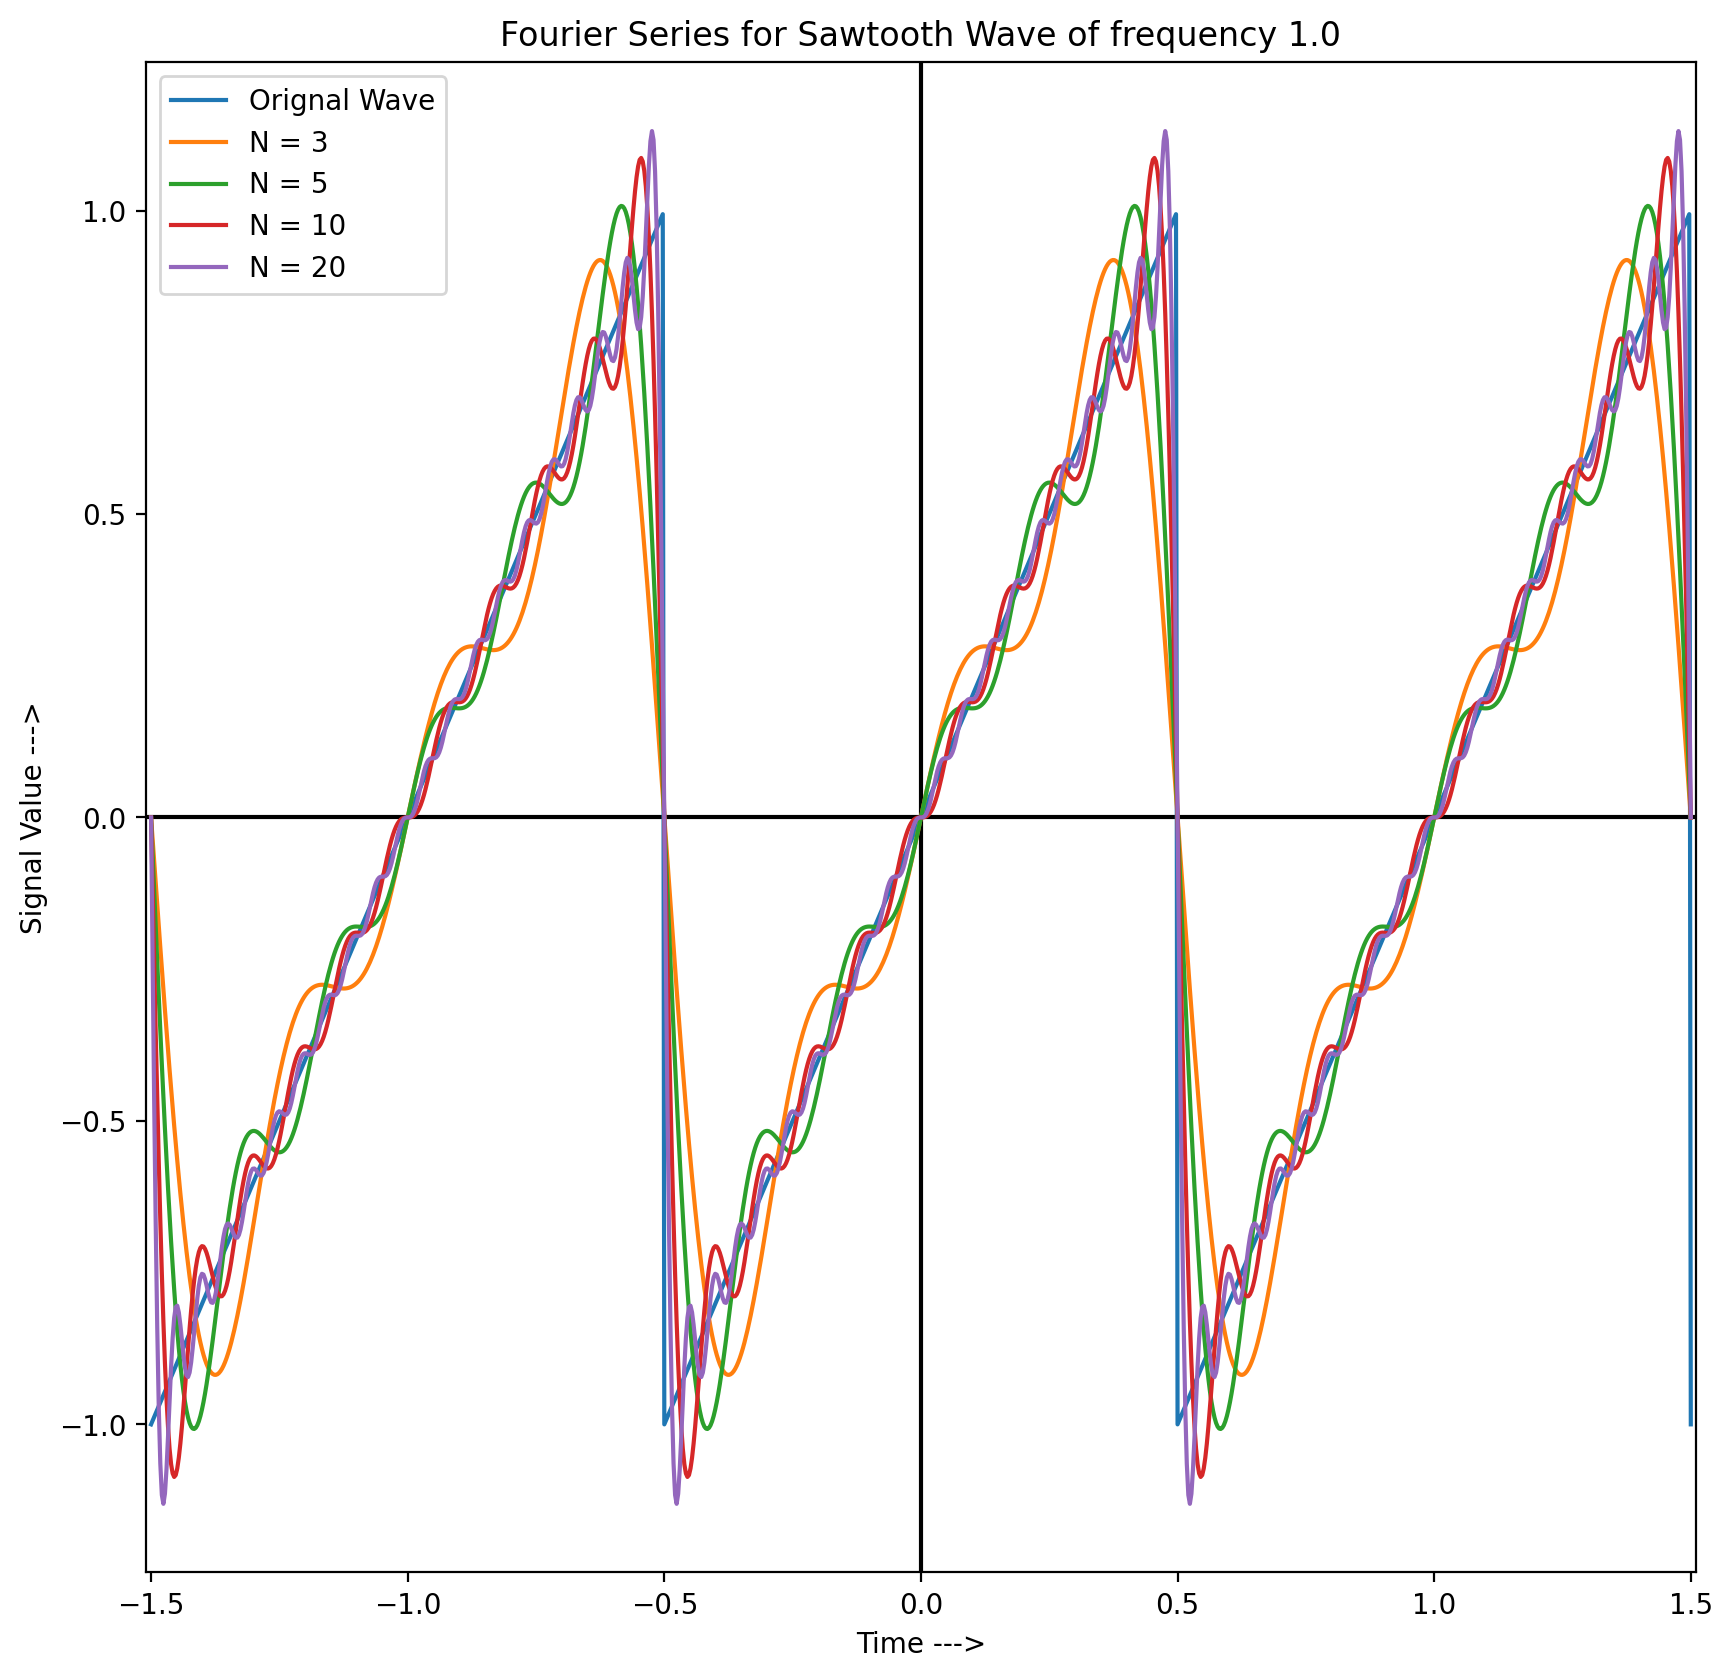

In [4]:
fej_obj.plot_wave([3,5,10,20],plot_orignal=True)

## Plotting the error signal

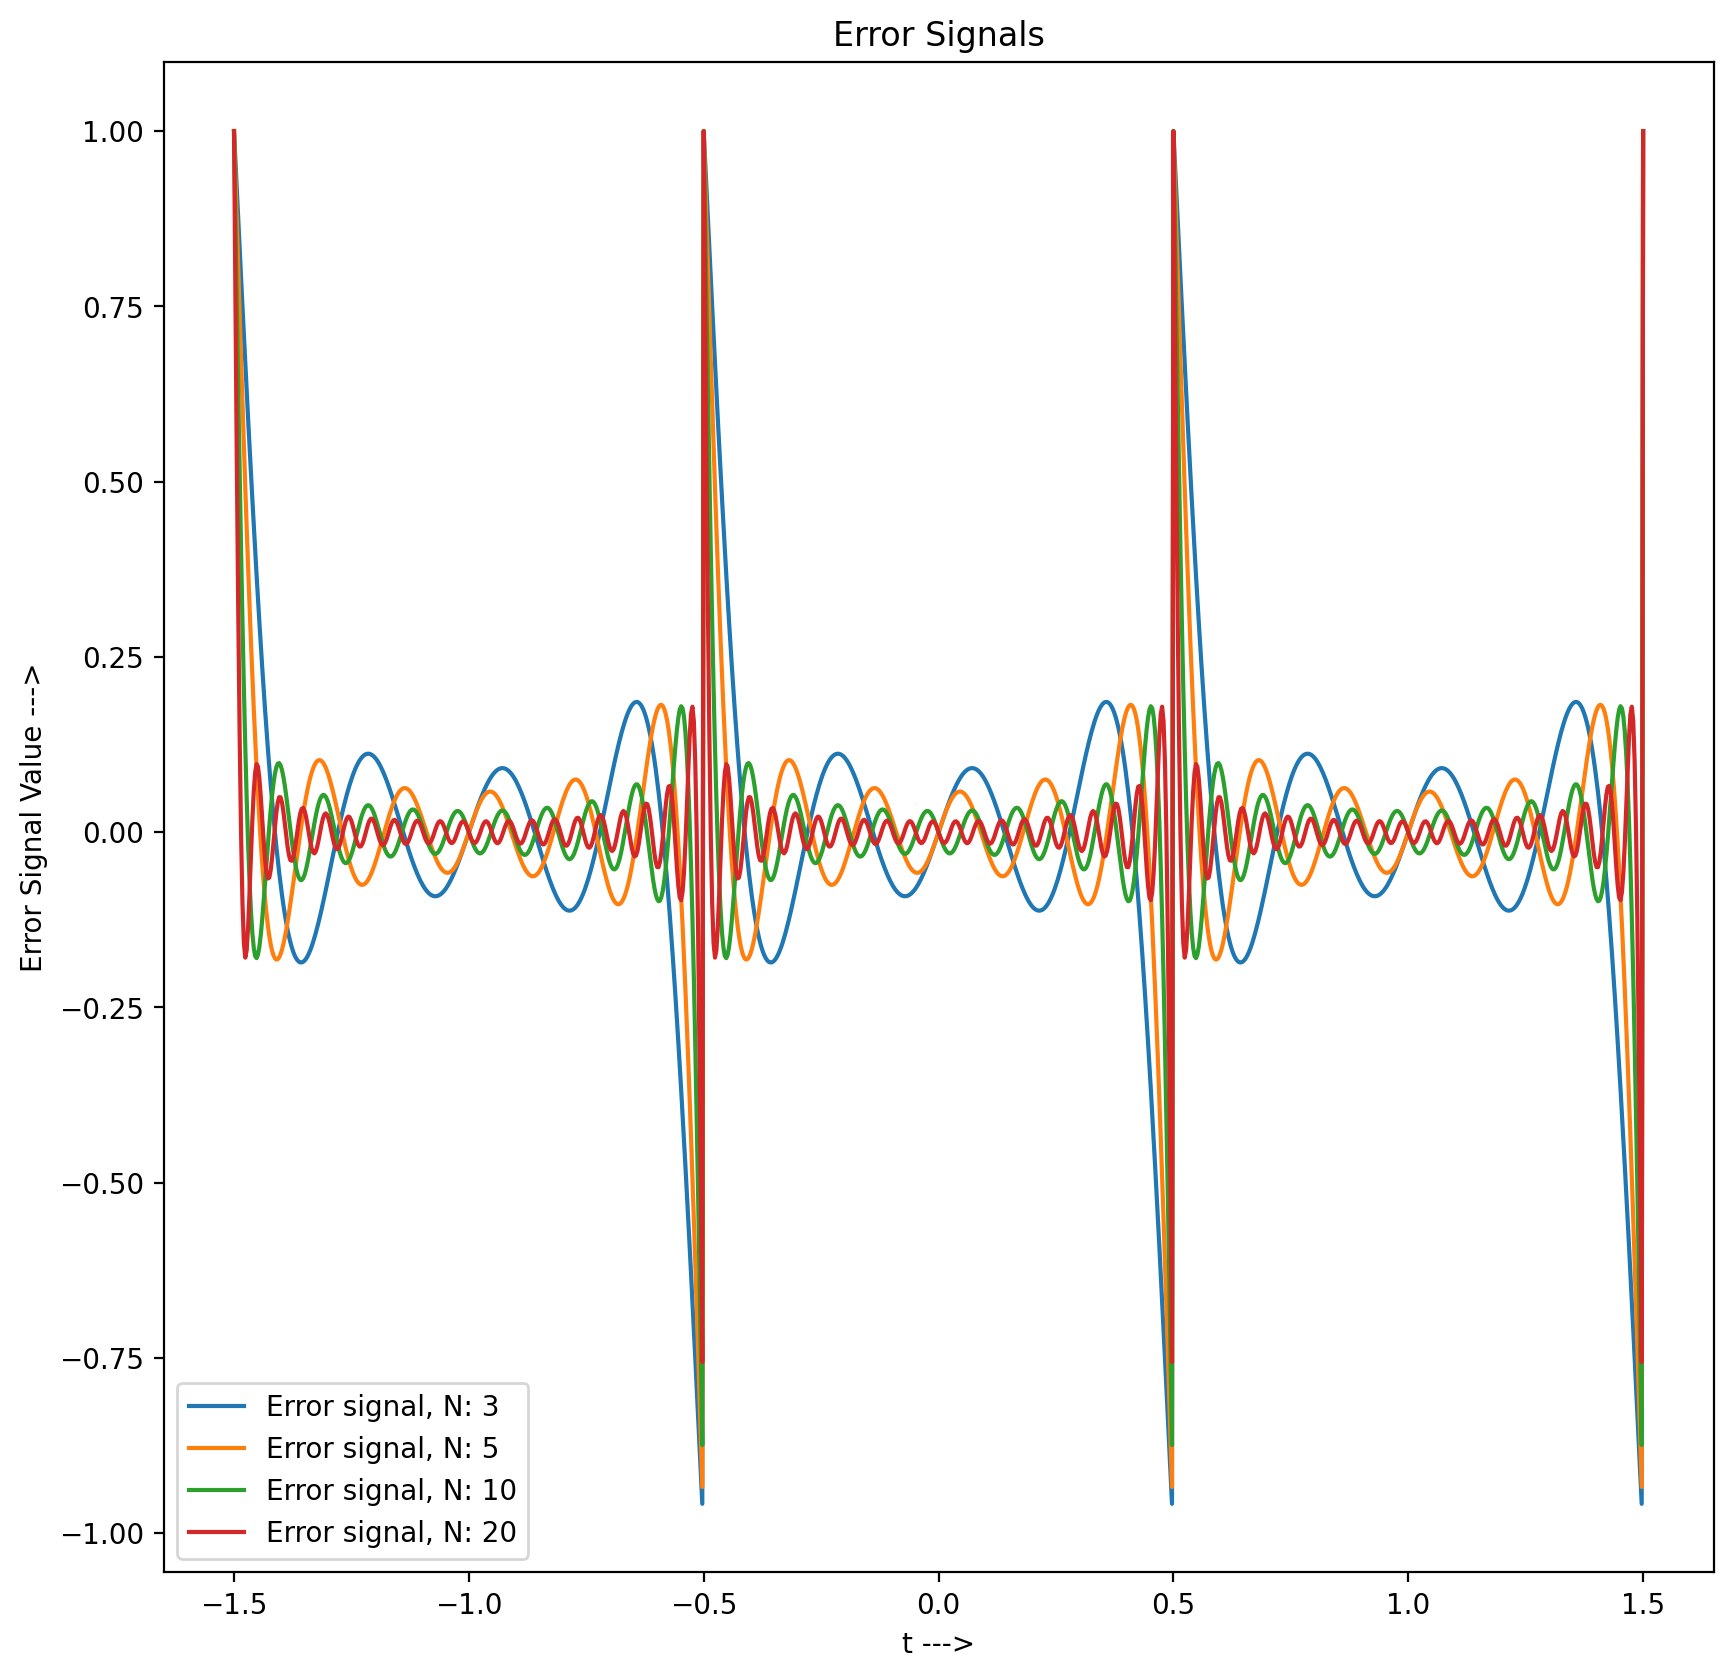

In [5]:
fej_obj.plot_error([3,5,10,20], False)

## Generating and Plotting the Power Error Percentage Values

The Minimum Power Error of 3.26% was Achieved at N: 20


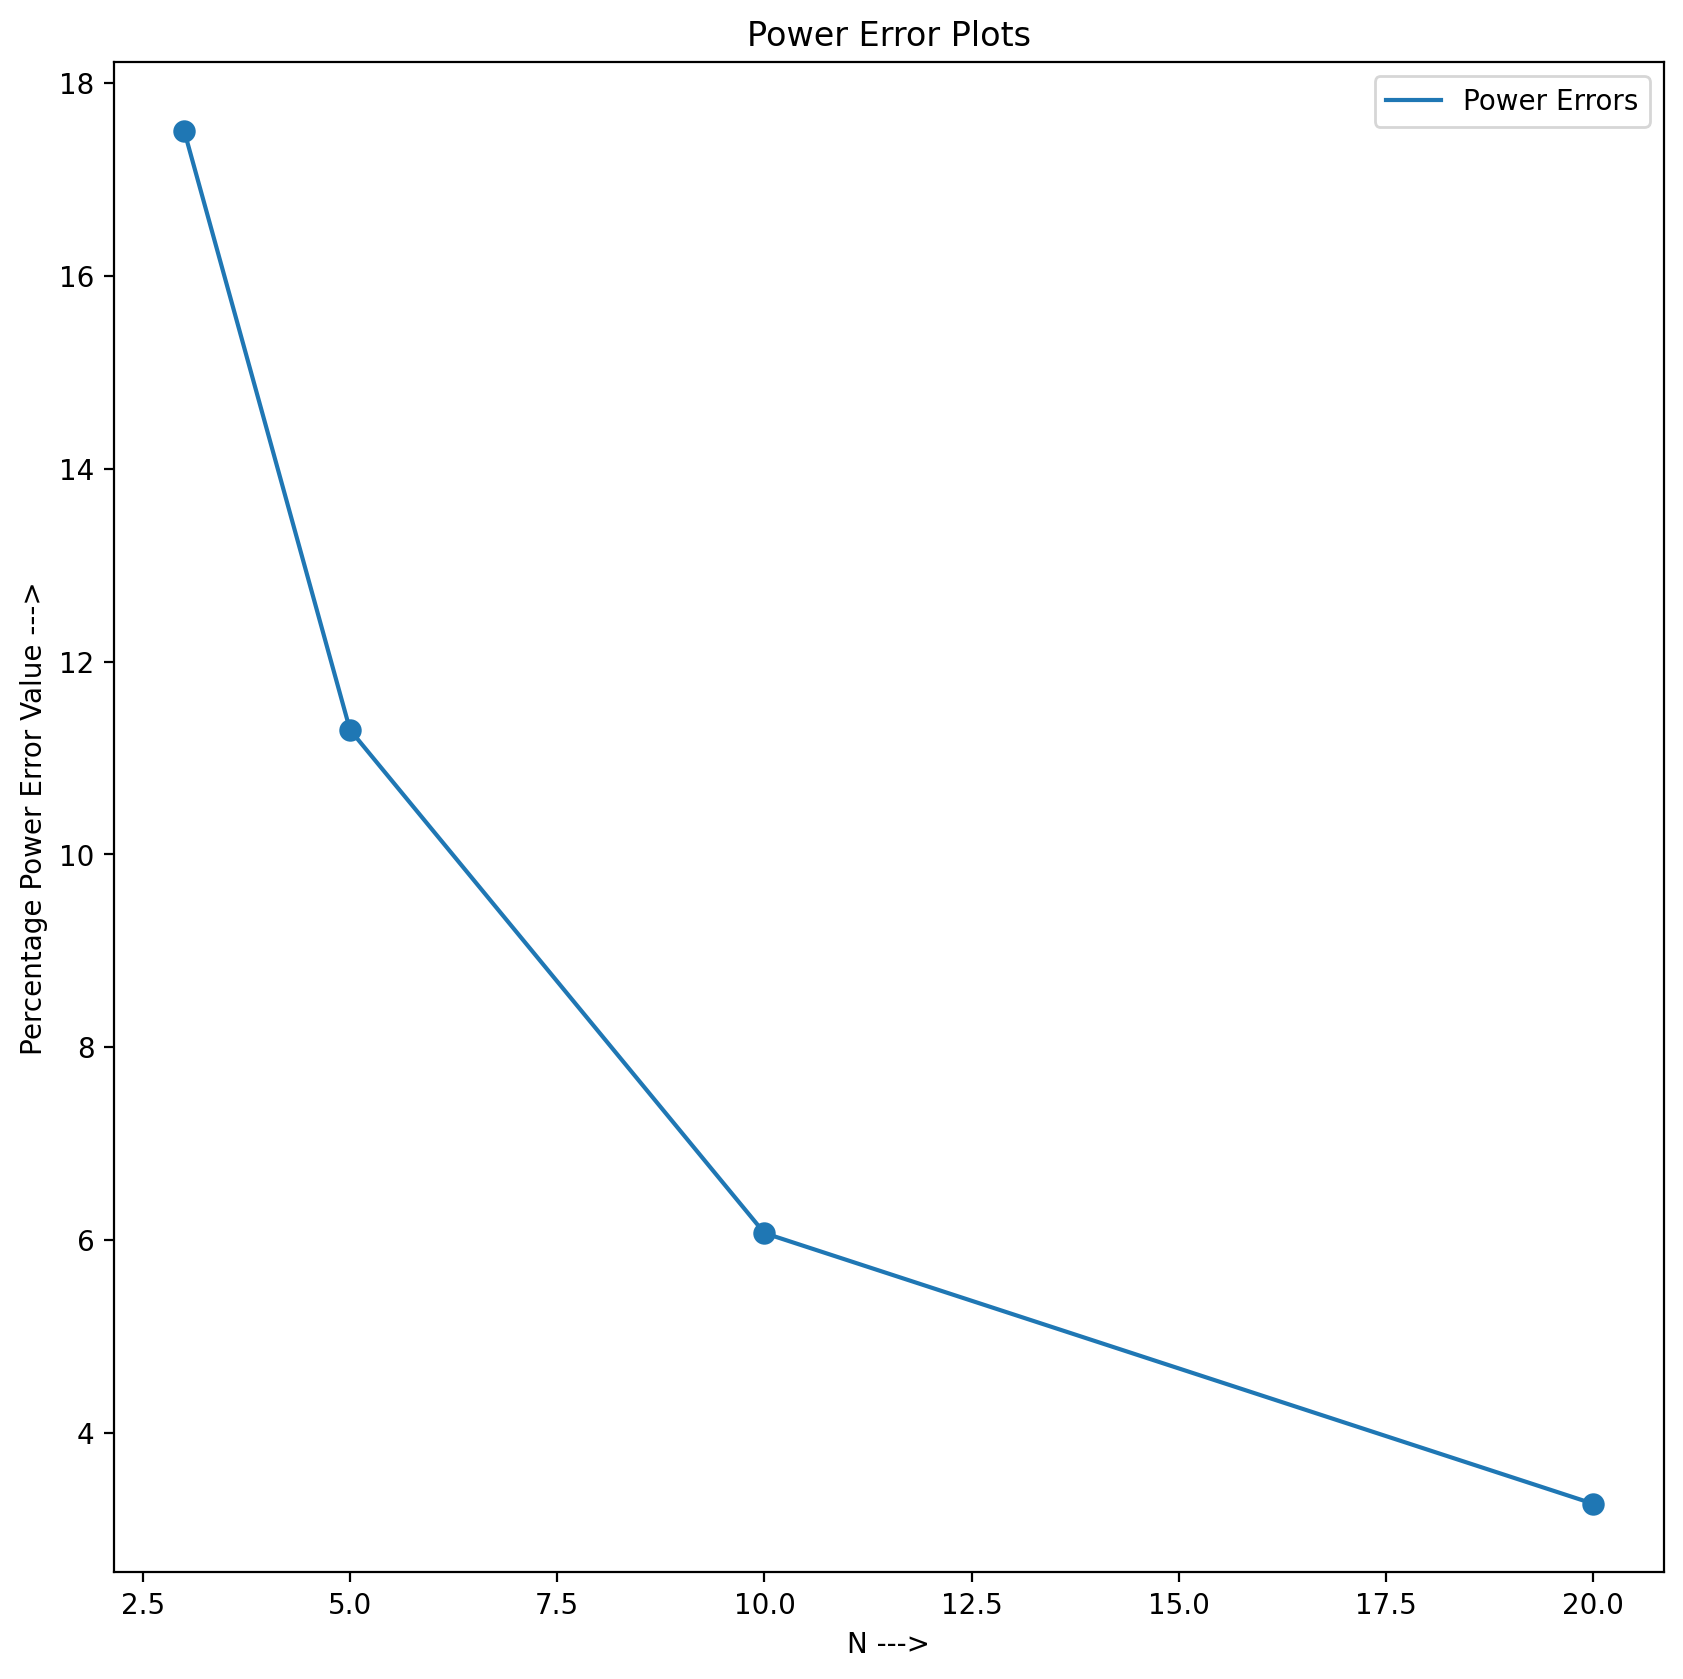

In [6]:
fej_obj.plot_error([3,5,10,20])

## Number of Terms needed to approximate the waveform with ~1% error

We plot the power error percentage and we highlight the first values of N for which the desired value of error is satisfied

The Minimum Power Error of 1.0% was Achieved at N: 91


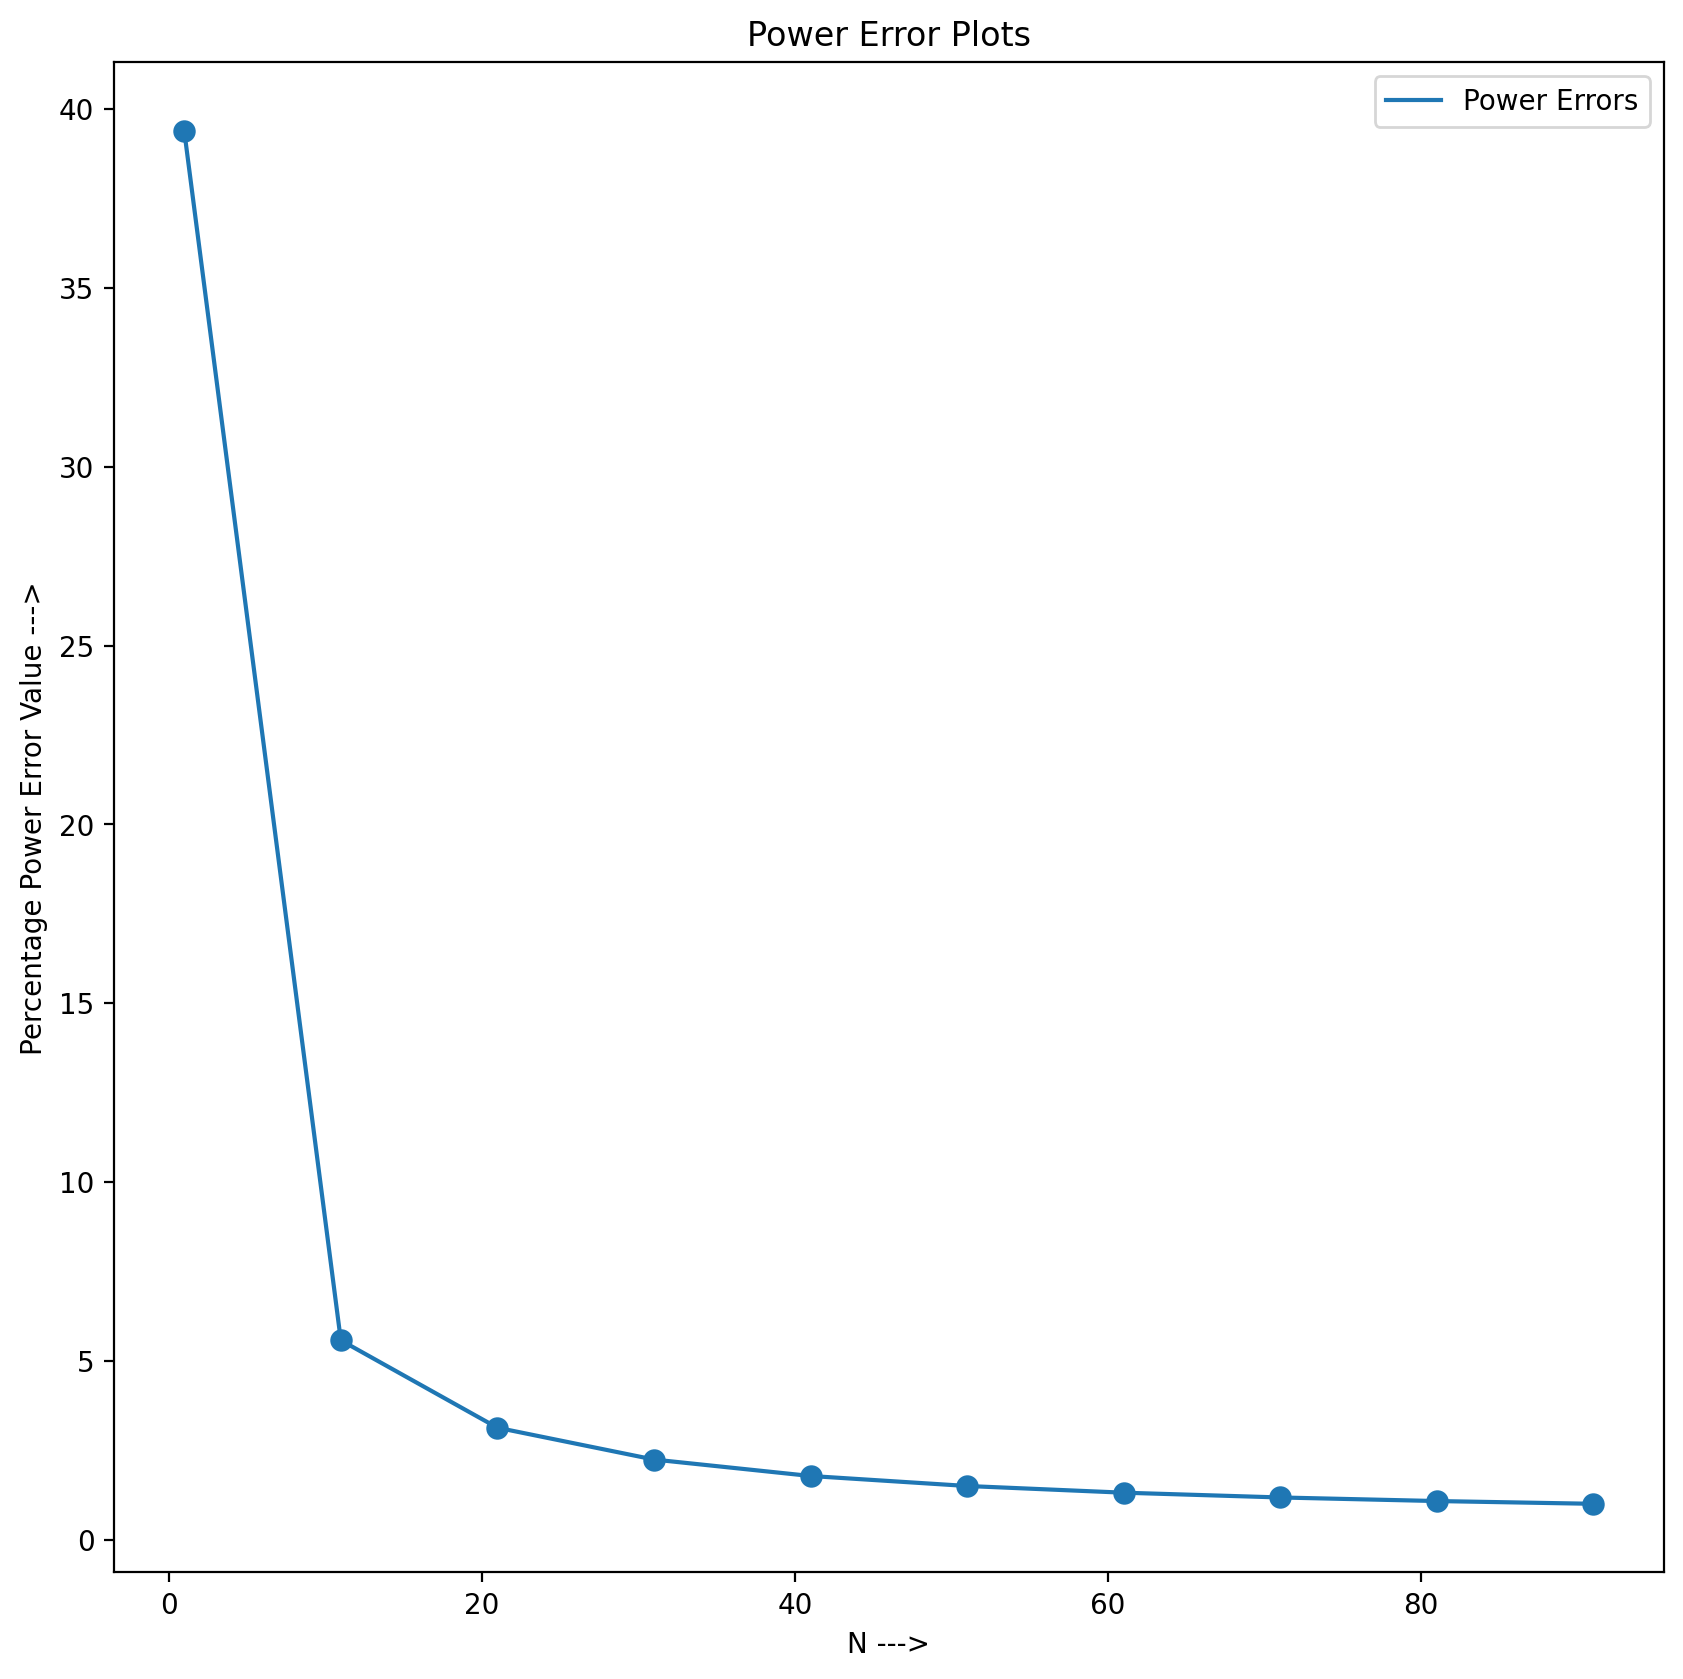

In [7]:
fej_obj.plot_error(range(1,100,10))

## Plotting The Dirichlet Kernel in 2D

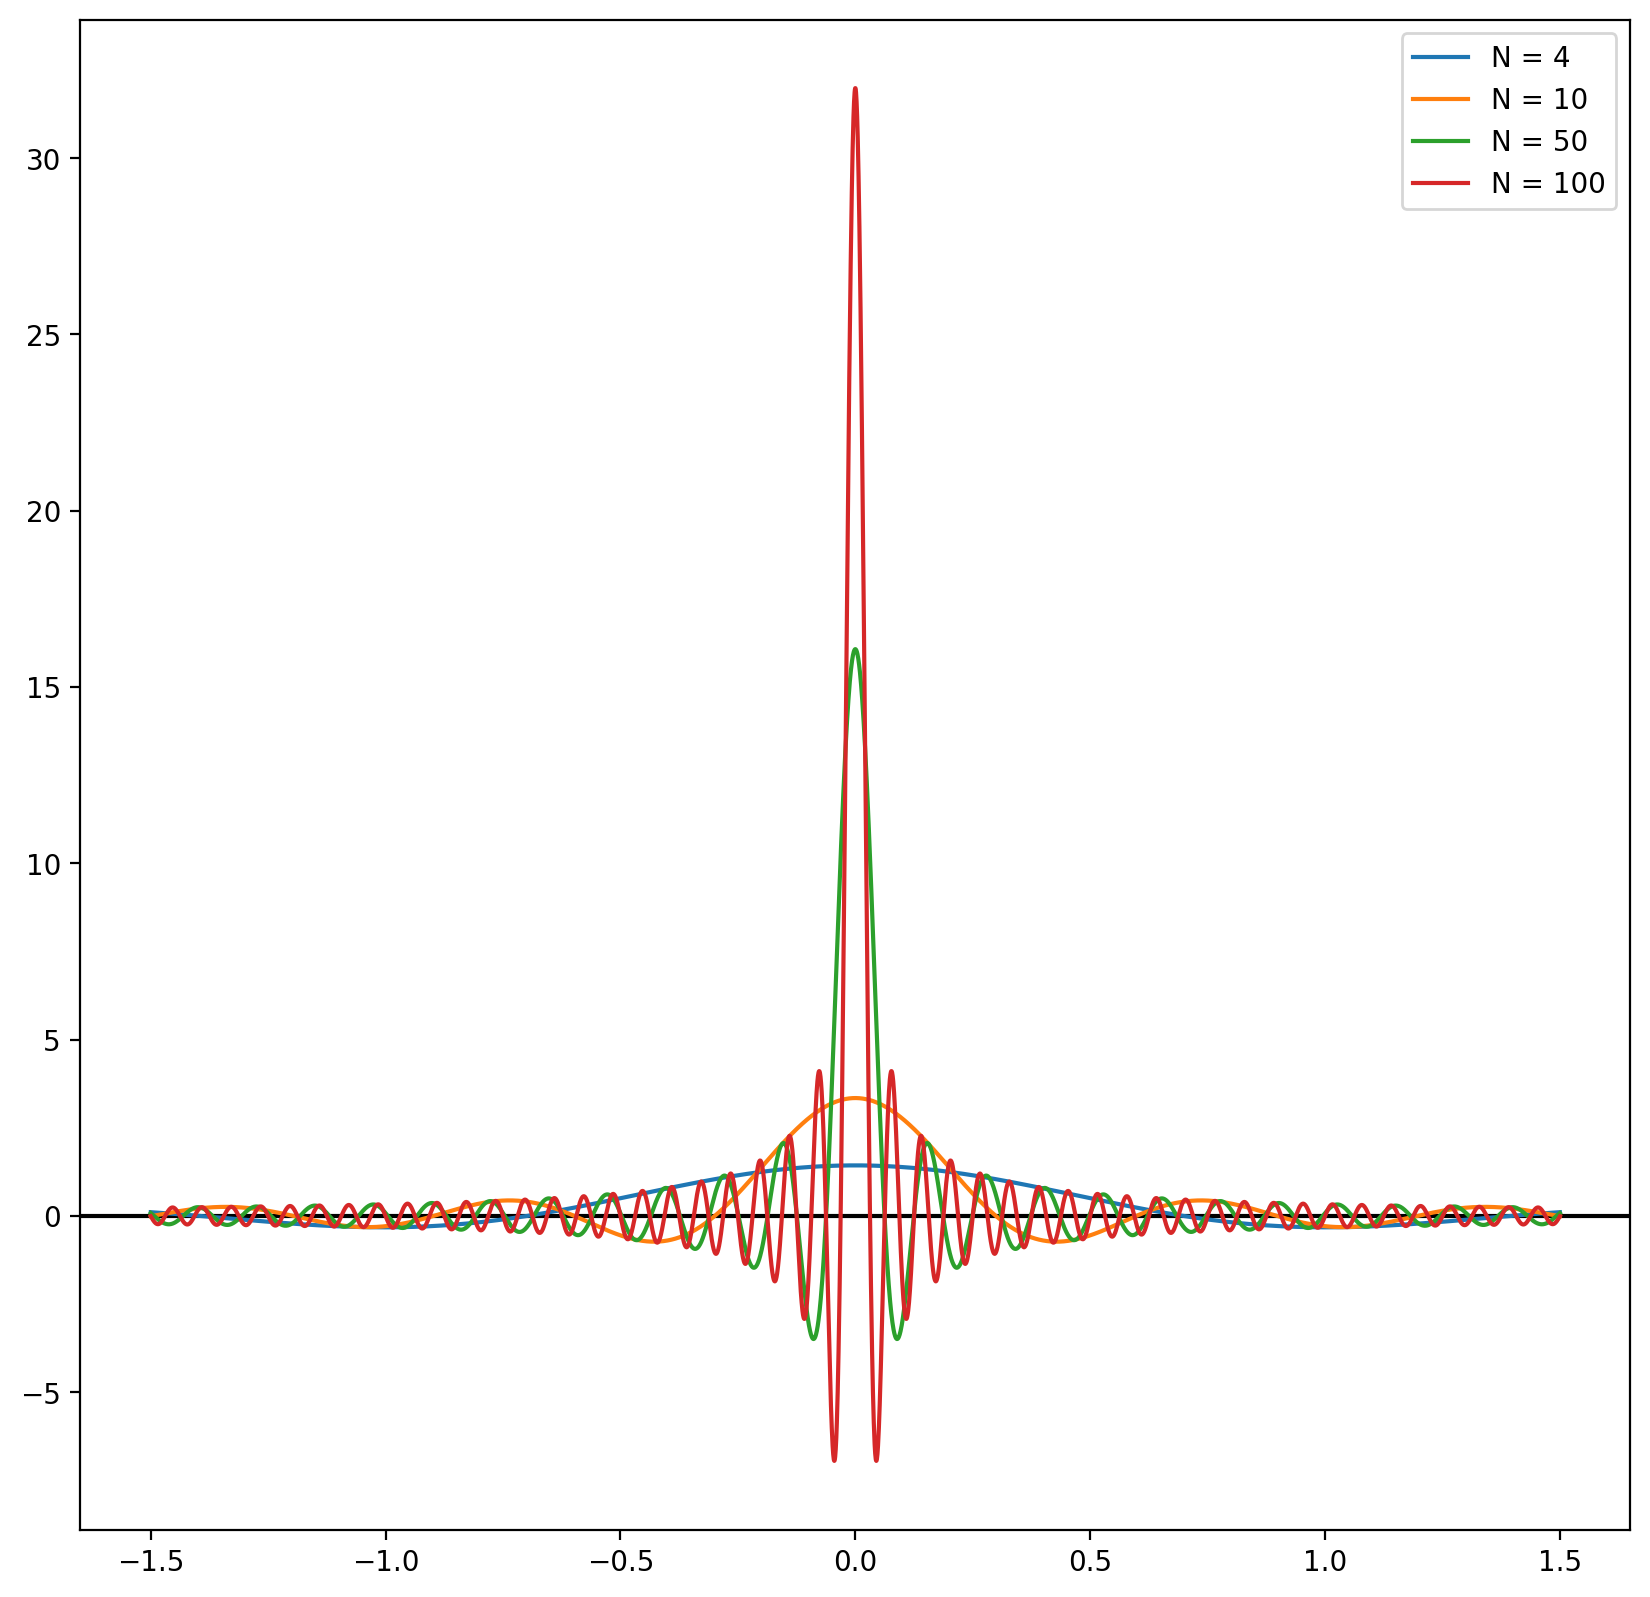

In [8]:
fej_obj.dirichlet_kernel([4,10,50,100])

## Plotting the Dirichlet Kernel in 3D

This function generates the z-coordinates for the kernel

In [9]:
def dirichlet_kernel(N,i=1):
    if i==1:
        t = np.linspace(np.pi,0.00001,5000)
    if i==2:
        t = np.linspace(-np.pi,0.00001,5000)
    DK = (1/(2*np.pi))*(np.sin((N+0.5)*t))/(np.sin(t/2))
    return DK 


We now generate the unit circle

In [10]:
X = np.linspace(-1,1,5000)
Y_1 = 1 - np.multiply(X,X)
Y_2 = -Y_1

We now Plot the Kernel

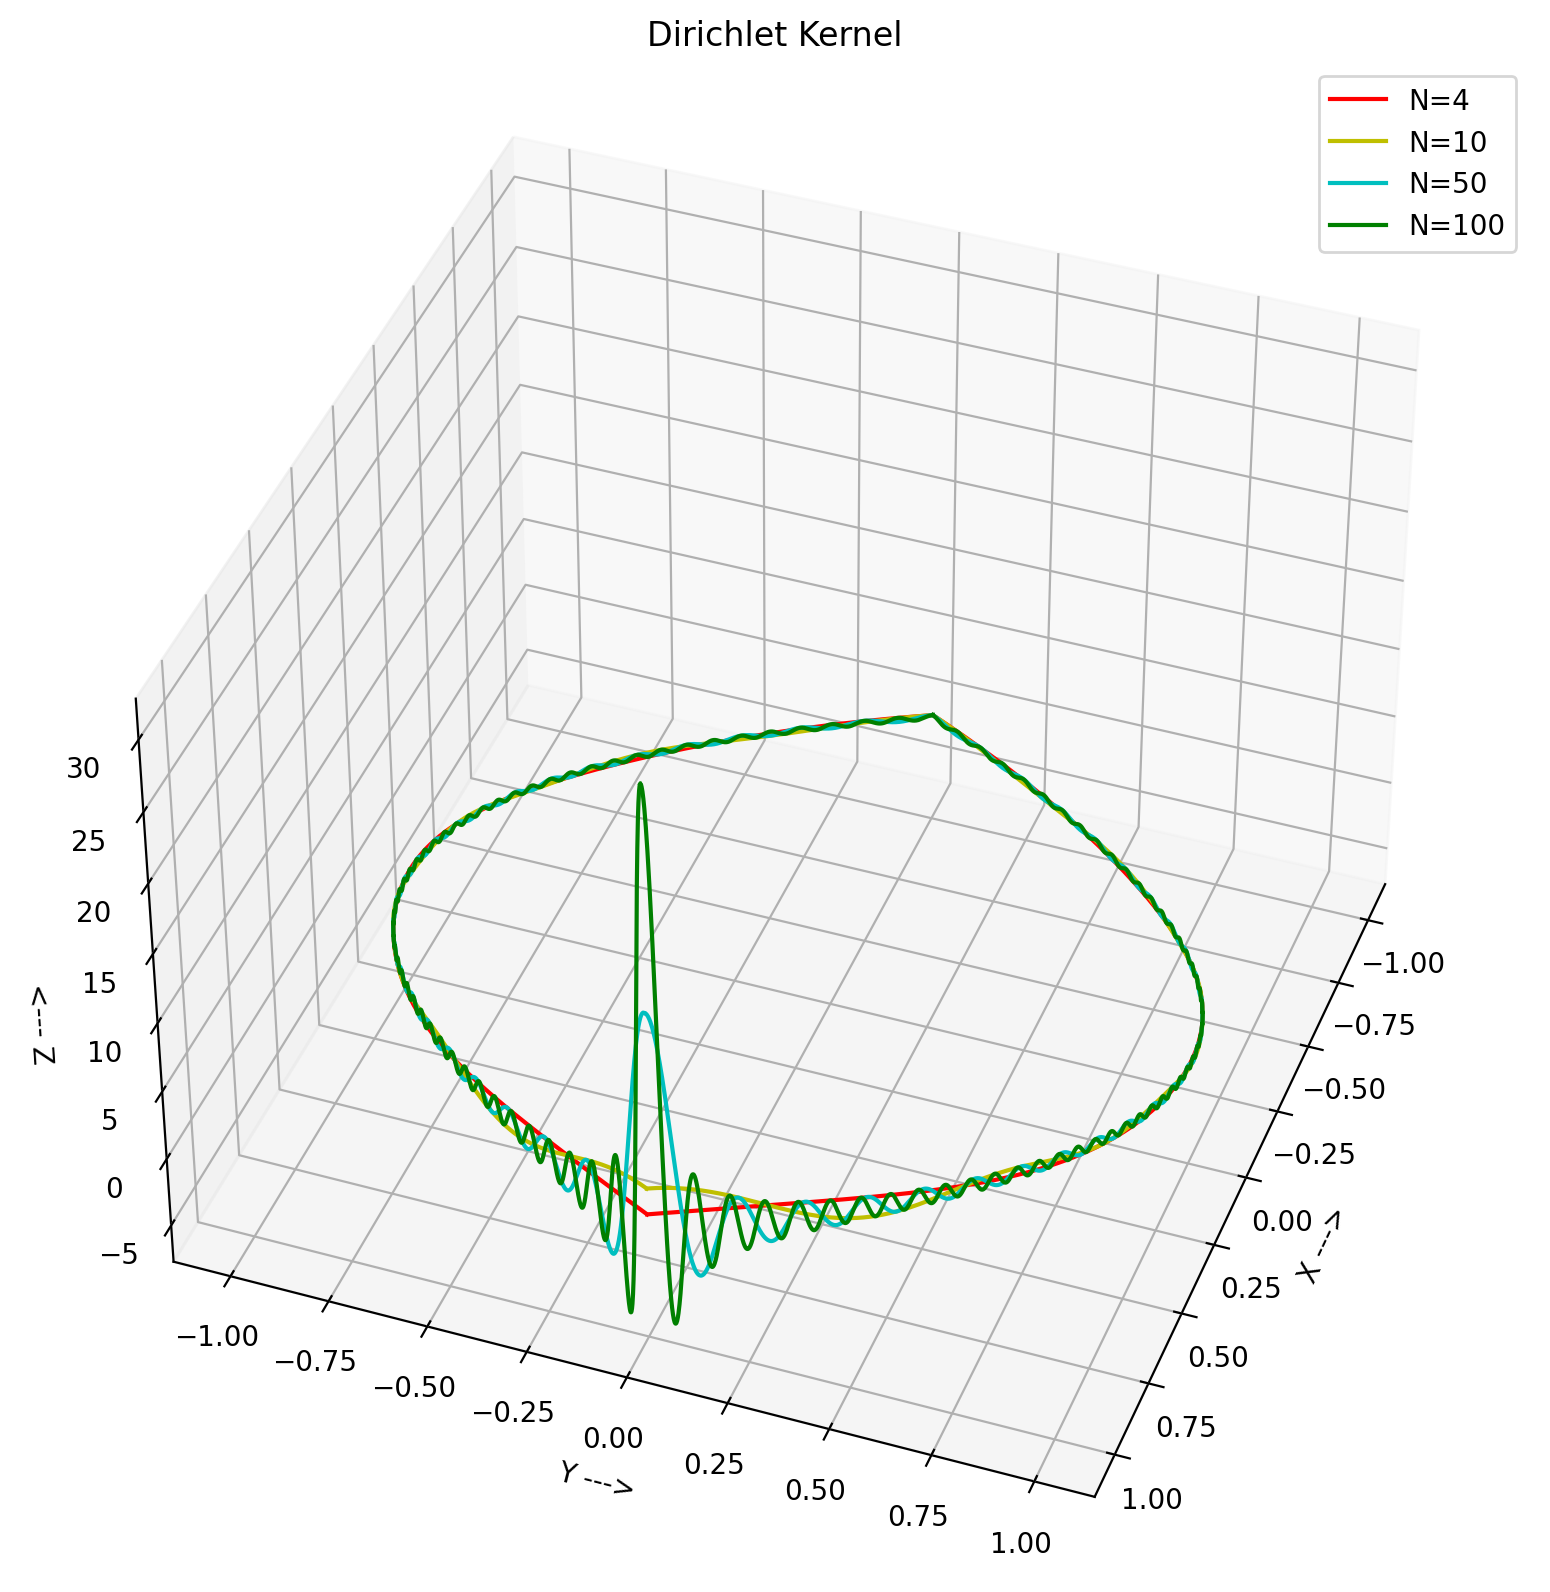

In [11]:
fig_3d = plt.figure(figsize=[10,10],dpi=200)
ax_3d = plt.axes(projection='3d')
ax_3d.set_title("Dirichlet Kernel")
ax_3d.set_xlabel("X --->")
ax_3d.set_ylabel("Y --->")
ax_3d.set_zlabel("<--- Z")
ax_3d.plot3D(X,Y_1,dirichlet_kernel(4,1),color='red',label="N=4")
ax_3d.plot3D(X,Y_2,dirichlet_kernel(4,2),color='red')
ax_3d.plot3D(X,Y_1,dirichlet_kernel(10,1),color='y',label="N=10")
ax_3d.plot3D(X,Y_2,dirichlet_kernel(10,2),color='y')
ax_3d.plot3D(X,Y_1,dirichlet_kernel(50,1),color='c',label="N=50")
ax_3d.plot3D(X,Y_2,dirichlet_kernel(50,2),color='c')
ax_3d.plot3D(X,Y_1,dirichlet_kernel(100,1),color='g',label="N=100")
ax_3d.plot3D(X,Y_2,dirichlet_kernel(100,1),color='g')
ax_3d.legend()
ax_3d.view_init(40,20)

## Computing and Plotting the Integral of the Drichilet Kernel

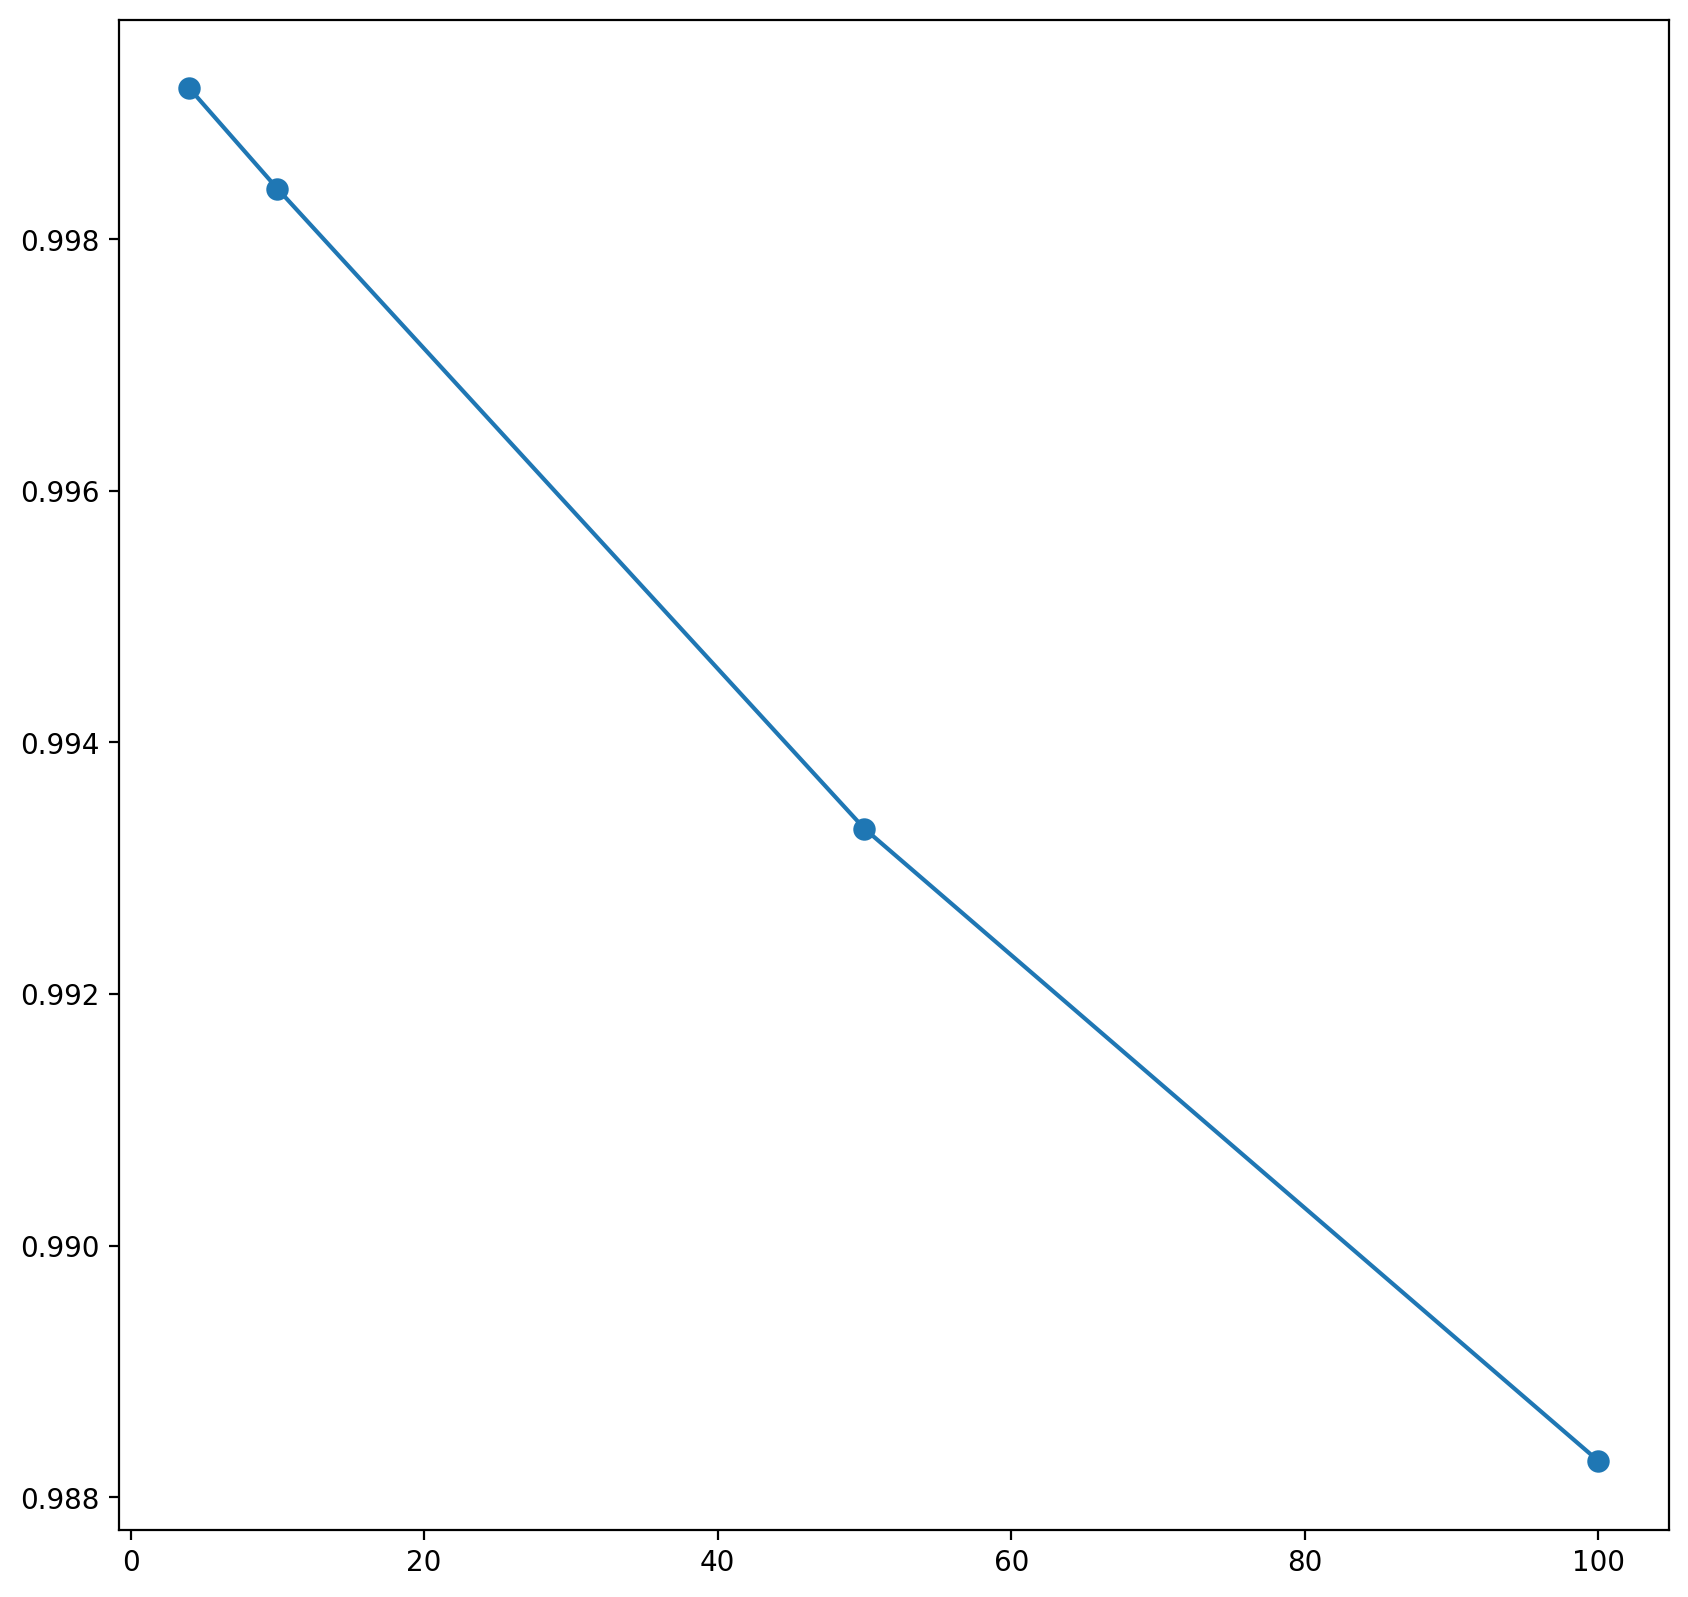

In [12]:
fej_obj.compute_integral([4,10,50,100])

## Computing the absolute values:

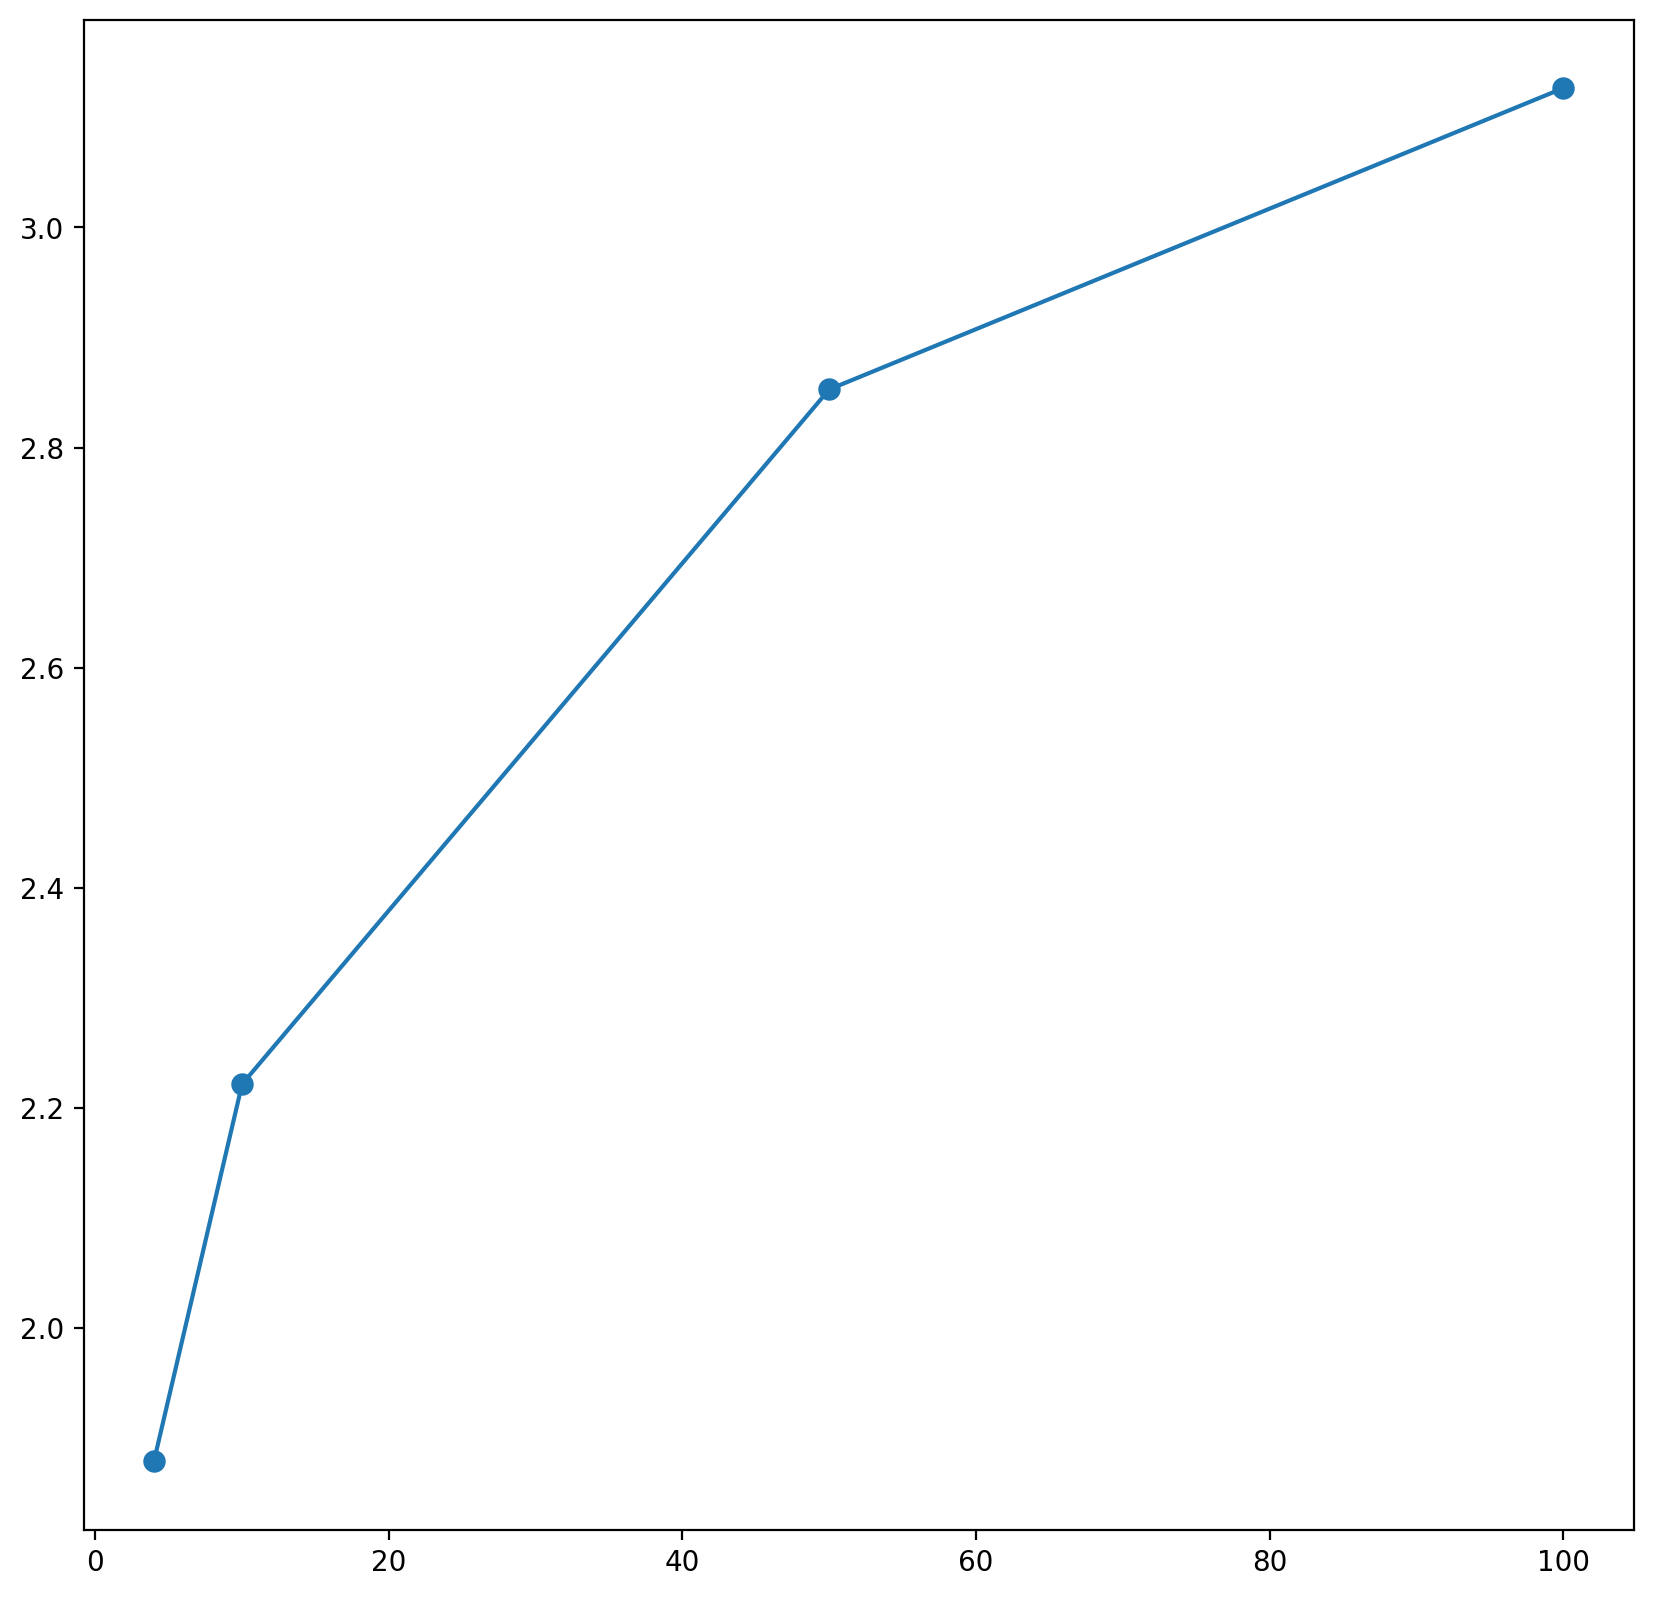

In [13]:
fej_obj.compute_integral([4,10,50,100],abs_val=True)